<a href="https://colab.research.google.com/github/mnikolic7/PHY562_Spring25_MakingMeasurements/blob/main/main_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio

!wget https://github.com/mnikolic7/PHY562_Spring25_MakingMeasurements/raw/refs/heads/main/pair_rule_expression_data.mat
data = sio.loadmat('pair_rule_expression_data.mat')

In [69]:
age=data['age'].flatten()
Nemb=age.shape[0];

Eve=data['profiles_eve']
Run=data['profiles_run']
Prd=data['profiles_prd']

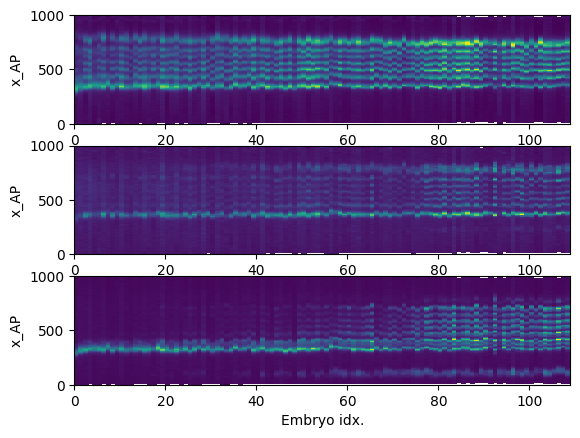

In [70]:
ax1=plt.subplot(3,1,1)
ax1.pcolor(Eve)
plt.xlabel('Embryo idx.')
plt.ylabel('x_AP')

ax2=plt.subplot(3,1,2)
ax2.pcolor(Run)
plt.xlabel('Embryo idx.')
plt.ylabel('x_AP')

ax3=plt.subplot(3,1,3)
ax3.pcolor(Prd)
plt.xlabel('Embryo idx.')
plt.ylabel('x_AP')

plt.show()